## HomeWork 4

## Домашнее задание 1

### 1.1. Скачать данные по ссылке https://www.kaggle.com/datasets/ionaskel/laptop-prices

- id - Уникальный ID для каждого дома
- date - Дата продажи дома
- price - Стоимость продажи дома
- bedrooms - Кол-во спален
- bathrooms - Кол-во ванных комнат (0.5 - туалет без душа)
- sqft_living - Кв. метры жилые
- sqft_lot - Кв. метры общие
- floors - Кол-во этажей
- waterfront - Есть набержная или нет
- view - Значение от 0 до 4 насколько хороший вид
- condition - Значение от 1 до 5 насколько хорошее состояние
- grade - Значение от 1 до 13, где 1-3 плохая конструкция здания и дизайн, 7 - средний уровень конструкции и дизайна, 11-13 - высокое качество конструкции и дизайна
- sqft_above - Кв. метры дома, которые находятся выше земли
- sqft_basement - Кв. метры дома, которые находятся ниже земли
- yr_built - Год постройки дома
- yr_renovated - Год ремонта дома
- zipcode - Индекс
- lat - Широтма
- long - Долгота
- sqft_living15 - Кв. метры жилой площади у 15 соседей
- sqft_lot15 - Кв. метры общей площади у 15 соседей

- Считать данные с помощью pandas

In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('./kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


- Постройте график
- Назовите график
- Сделайте именование оси x и оси y
- Сделайте выводы

### 1.2 Изучите стоимости недвижимости

In [4]:
df['price'].describe().round(2)

count      21613.00
mean      540088.14
std       367127.20
min        75000.00
25%       321950.00
50%       450000.00
75%       645000.00
max      7700000.00
Name: price, dtype: float64

In [5]:
cut_range = ['<0,5млн$','<1млн$', '<2млн$', '<3млн$', '<4млн$', '<5млн$', '<6млн$', '<7млн$', '<8млн$']
cut_bins = [0, 500000, 1000000, 2000000, 3000000, 4000000, 5000000, 6000000, 7000000, 8000000]
df_price = pd.cut(df['price'], cut_bins, labels=cut_range).value_counts()
df_price

<0,5млн$    12560
<1млн$       7588
<2млн$       1267
<3млн$        153
<4млн$         34
<5млн$          4
<6млн$          4
<8млн$          2
<7млн$          1
Name: price, dtype: int64

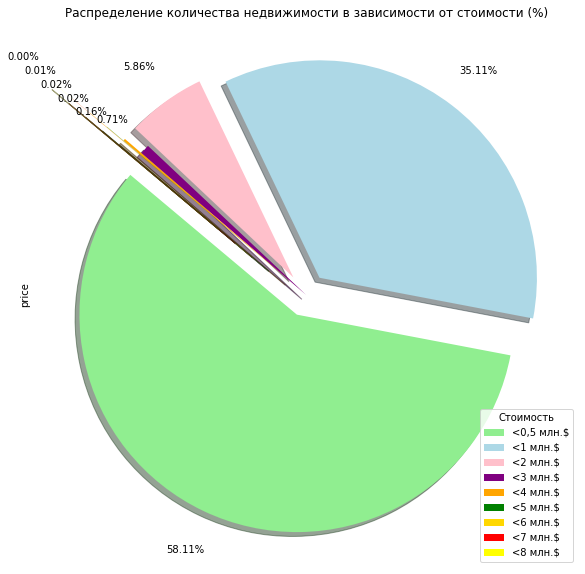

In [6]:
colors = ['lightgreen', 'lightblue', 'pink', 'purple', 'orange','green', 'gold', 'red', 'yellow']
explode=[0.1, 0.1, 0.1, 0, 0.1, 0.2, 0.3, 0.4, 0.5]
plt.title('Распределение количества недвижимости в зависимости от стоимости (%)')
df_price.plot.pie(figsize=(10, 10), autopct='%1.2f%%',startangle=140,
                  shadow=True, labels=None, pctdistance=1.2, colors=colors, explode = explode);
plt.legend(['<0,5 млн.$','<1 млн.$', '<2 млн.$','<3 млн.$', '<4 млн.$','<5 млн.$','<6 млн.$',
            '<7 млн.$','<8 млн.$'],loc='lower right', title='Стоимость');

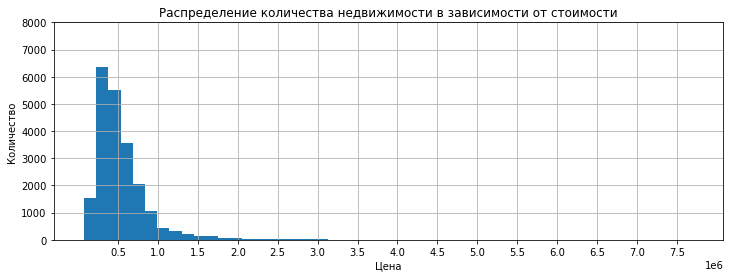

In [7]:
plt.figure(figsize=(12,4))

plt.hist(df['price'], bins=50)
plt.title('Распределение количества недвижимости в зависимости от стоимости')
plt.xlabel('Цена')
plt.ylabel('Количество')
plt.xticks(list(range(500000,8000000,500000)))
plt.yticks(range(0,9000,1000))
plt.grid();

**Выводы :** 
- больше всего квартир - 12 560 шт (58,11%) стоимостью до 0,5 млн. долларов;
- квартир стоимостью от 0,5 млн. до 1 млн. долларов - 7 588 шт.(35,11%);
- квартир стоимостью от 1 млн. до 2 млн. долларов - 1 267 шт.(5,86%);
- квартир стоимостью выше 2 млн. долларов - 198 шт.(0,92%);

Самая дорогая квартира стоит 7,7 млн долларов, самая дешевая - 75 тыс. долларов

### 1.3 Изучите распределение квадратуры жилой площади

In [8]:
df['sqft_living'].describe().round(2)

count    21613.00
mean      2079.90
std        918.44
min        290.00
25%       1427.00
50%       1910.00
75%       2550.00
max      13540.00
Name: sqft_living, dtype: float64

In [9]:
cut_living = ['<500 м2','<1000 м2', '<2000 м2', '<3000 м2','<4000 м2','> 4000 м2' ]
cut_bins = [0, 500, 1000, 2000, 3000, 4000, 14000]
df_living = pd.cut(df['sqft_living'], cut_bins, labels=cut_living).value_counts()
df_living

<2000 м2     10218
<3000 м2      6819
<4000 м2      2299
<1000 м2      1476
> 4000 м2      783
<500 м2         18
Name: sqft_living, dtype: int64

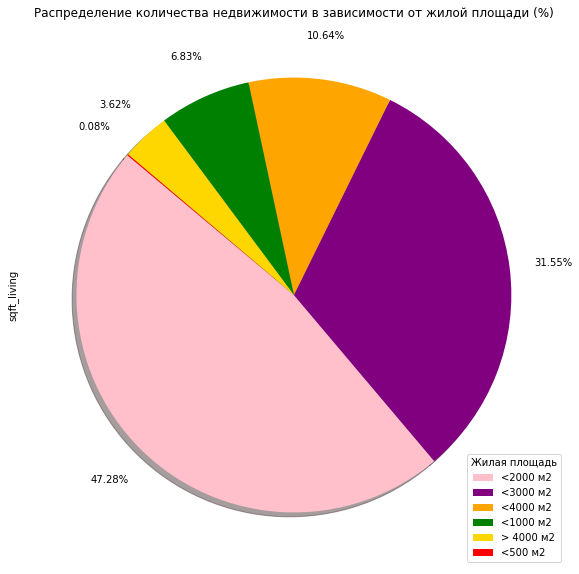

In [10]:
colors = ['pink', 'purple', 'orange','green', 'gold', 'red', 'yellow']
# explode=[0.1, 0.1, 0.1, 0, 0.1, 0.2, 0.3]
plt.title('Распределение количества недвижимости в зависимости от жилой площади (%)')
df_living.plot.pie(figsize=(10, 10), autopct='%1.2f%%',startangle=140,
                  shadow=True, labels=None, pctdistance=1.2, colors=colors);
plt.legend(['<2000 м2', '<3000 м2','<4000 м2','<1000 м2','> 4000 м2','<500 м2'],loc='lower right', title='Жилая площадь');

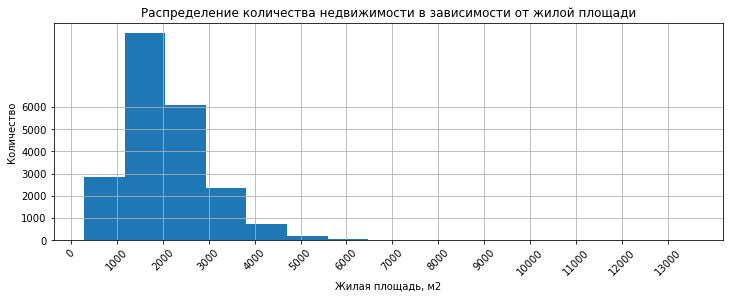

In [11]:
plt.figure(figsize=(12,4))

plt.hist(df['sqft_living'], bins=15)
plt.title('Распределение количества недвижимости в зависимости от жилой площади')
plt.xlabel('Жилая площадь, м2')
plt.ylabel('Количество')
plt.xticks(list(range(0,14000,1000)), rotation=45)
plt.yticks(range(0,7000,1000))
plt.grid();

**Выводы :**

- больше всего квартир - 10 218 шт (47,28%) с жилой площадью от 1 до 2 тыс м2;
- квартир с жилой площадью от 2 до 3 тыс м2 - 6 819 шт.(31,55%);
- квартир с жилой площадью от 3 до 4 тыс м2 - 2 299 шт.(10,64%);
- квартир с жилой площадью меньше 1 тыс м2 - 1 476 шт.(6,83%);
- квартир с жилой площадью меньше 0,5 тыс м2 - 18 шт.(0,08%);
- квартир с жилой площадью больше 4 тыс м2 - 783 шт.(3,62%);

Квартира с самой маленькой жилой площадью - 290 м2, с самой больщой жилой площадью - 13 540 м2

### 1.4 Изучите распределение года постройки

In [12]:
df['yr_built'].describe().round(2)

count    21613.00
mean      1971.01
std         29.37
min       1900.00
25%       1951.00
50%       1975.00
75%       1997.00
max       2015.00
Name: yr_built, dtype: float64

In [13]:
cut_year = ['до 1925г','до 1950г','до 1975г','до 2000г','до 2015г']
cut_bins = [0, 1925, 1950, 1975, 2000, 2015]
df_year = pd.cut(df['yr_built'], cut_bins, labels=cut_year).value_counts()
df_year

до 2000г    6138
до 1975г    5747
до 2015г    4541
до 1950г    3079
до 1925г    2108
Name: yr_built, dtype: int64

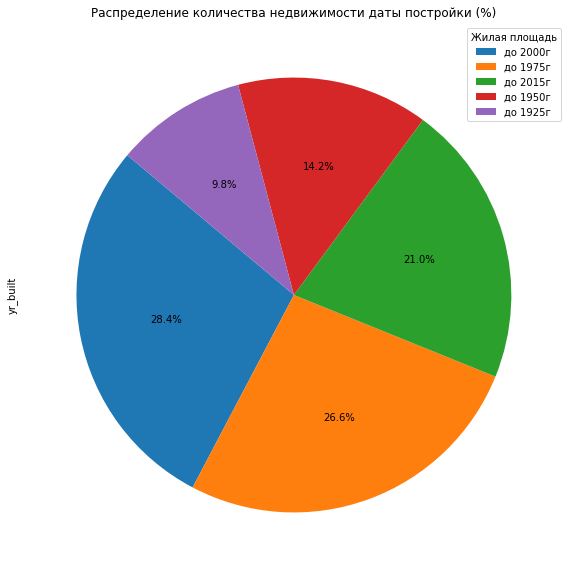

In [14]:
plt.title('Распределение количества недвижимости даты постройки (%)')
df_year.plot.pie(figsize=(10, 10), autopct='%1.1f%%',startangle=140,
                  labels=None);
plt.legend(['до 2000г','до 1975г','до 2015г','до 1950г','до 1925г'],loc='upper right', title='Жилая площадь');

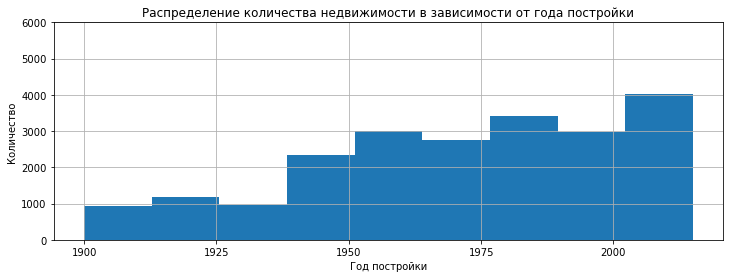

In [15]:
plt.figure(figsize=(12,4))

plt.hist(df['yr_built'], bins=9)
plt.title('Распределение количества недвижимости в зависимости от года постройки')
plt.xlabel('Год постройки')
plt.ylabel('Количество')
plt.xticks(list(range(1900,2025,25)))
plt.yticks(range(0,7000,1000))
plt.grid();

**Выводы :**
Есть 3 основные группы с годами постройки 1950 - 2015 гг (76 %) :
- квартиры с годом постройки 1975 - 2000 гг - 6 138 шт.(28,4%);
- квартиры с годом постройки 1950 - 1975 гг - 5 747 шт.(26,6%);
- квартиры с годом постройки 2000 - 2015 гг - 4 541 шт.(21,0%);
<br>                                                        <br>
- квартиры с годом постройки 1925 -1950 гг - 3 079 шт.(14,2%);
- квартиры с годом постройки 1900 -1925 гг - 2 108 шт.(9,8%);

Самая старая квартира 1900 г. постройки, самая новая квартира 2015 г. постройки

## Домашнее задание 2

- Постройте график
- Сделайте выводы

### 2.1 Изучите распределение домов от наличия вида на набережную

In [16]:
data = df['view'].value_counts()
data

0    19489
2      963
3      510
1      332
4      319
Name: view, dtype: int64

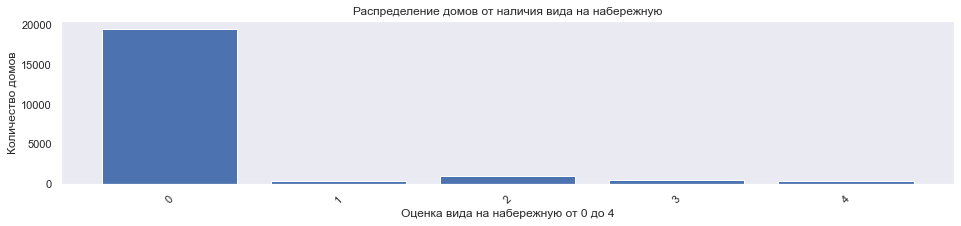

In [17]:
sns.set(rc={'figure.figsize': (16,3)})

plt.bar(data.index, data)
plt.title('Распределение домов от наличия вида на набережную')
plt.xlabel('Оценка вида на набережную от 0 до 4')
plt.ylabel('Количество домов')
plt.xticks(rotation=45)
# plt.yticks(range(0,550,50))
plt.grid();

**Выводы:**
- Больше всего квартир 19 489 шт с отсутствием вида на набережную.
- Квартир с каким либо видом на набережную но не на самой набережной (1-3) 1 805 шт
- Квартир на набережной (4) - всего 319 шт.


### 2.2 Изучите распределение этажей домов

In [18]:
data_floor = df['floors'].value_counts()
data_floor

1.0    10680
2.0     8241
1.5     1910
3.0      613
2.5      161
3.5        8
Name: floors, dtype: int64

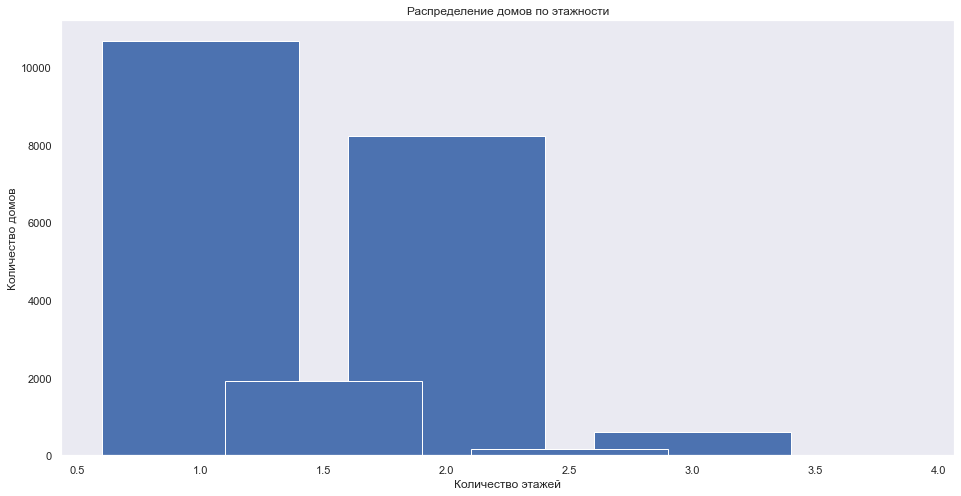

In [19]:
sns.set(rc={'figure.figsize': (16,8)})

plt.bar(data_floor.index, data_floor)
plt.title('Распределение домов по этажности')
plt.xlabel('Количество этажей')
plt.ylabel('Количество домов')
# plt.xticks(rotation=10)
# plt.yticks(range(0,550,50))
plt.grid();

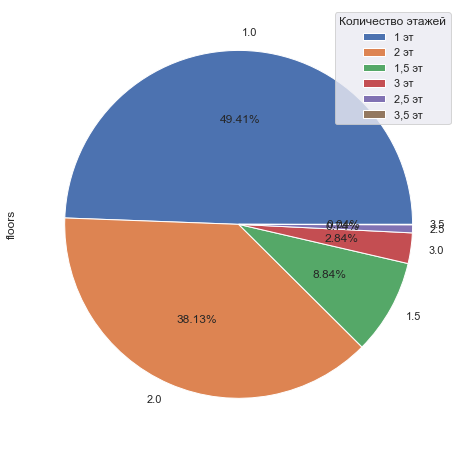

In [20]:
data_floor.plot.pie(y='floors', autopct='%.2f%%')
plt.legend(['1 эт','2 эт','1,5 эт','3 эт','2,5 эт','3,5 эт'],loc='upper right', title='Количество этажей');

**Выводы:**
- Больше всего квартир с 1 этажем 10 680 шт. (49,41%) и квартир с 2 этажами 8 241 шт. (38,13%).
- Меньше всего квартир с 3,5 этажами - 8 шт.

### 2.3 Изучите распределение состояния домов

In [21]:
data_condition = df['condition'].value_counts()
data_condition

3    14031
4     5679
5     1701
2      172
1       30
Name: condition, dtype: int64

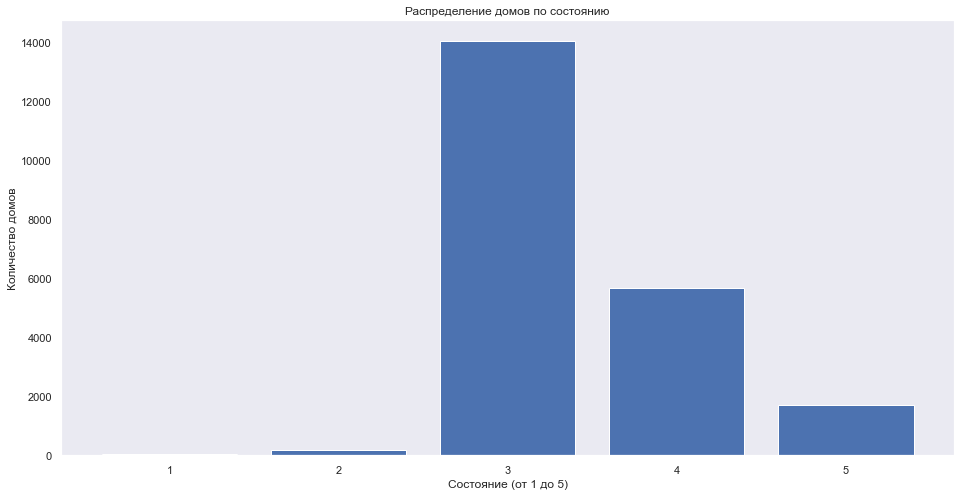

In [22]:
sns.set(rc={'figure.figsize': (16,8)})

plt.bar(data_condition.index, data_condition)
plt.title('Распределение домов по состоянию')
plt.xlabel('Состояние (от 1 до 5)')
plt.ylabel('Количество домов')
# plt.xticks(rotation=10)
# plt.yticks(range(0,550,50))
plt.grid();

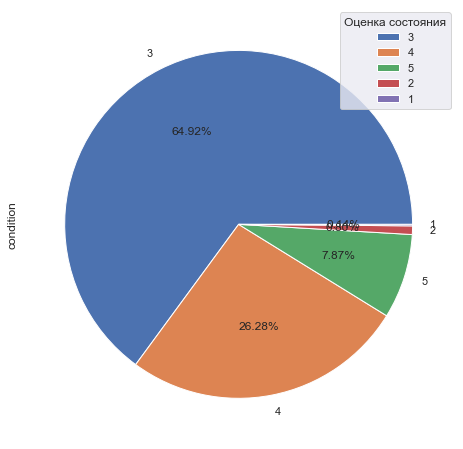

In [23]:
data_condition.plot.pie(y='floors', autopct='%.2f%%')
plt.legend([3, 4, 5, 2, 1],loc='upper right', title='Оценка состояния');

**Выводы:**
- Больше всего квартир с оценкой 3 - 14 031 шт. (64,92 %) и квартир с оценкой 4 - 5 679 шт. (26,28 %).
- Меньше всего квартир с оценкой 1 - 30 шт. и 2 - 172 шт.

## Домашнее задание 3

### Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости, с применением не менее 5 диаграмм из урока.

### Анализ сделайте в формате storytelling: дополнить каждый график письменными выводами и наблюдениями.

In [24]:
df_corr = df[['bedrooms', 'bathrooms', 'price', 'sqft_living', 'sqft_lot', 'sqft_basement',
              'floors', 'waterfront', 'view', 'condition', 'grade', 'yr_built', 'lat', 'long', 'sqft_living15']].corr().round(2)
df_corr

,bedrooms,bathrooms,price,sqft_living,sqft_lot,sqft_basement,floors,waterfront,view,condition,grade,yr_built,lat,long,sqft_living15
bedrooms,1.00,0.52,0.31,0.58,0.03,0.30,0.18,-0.01,0.08,0.03,0.36,0.15,-0.01,0.13,0.39
bathrooms,0.52,1.00,0.53,0.75,0.09,0.28,0.50,0.06,0.19,-0.12,0.66,0.51,0.02,0.22,0.57
price,0.31,0.53,1.00,0.70,0.09,0.32,0.26,0.27,0.40,0.04,0.67,0.05,0.31,0.02,0.59
sqft_living,0.58,0.75,0.70,1.00,0.17,0.44,0.35,0.10,0.28,-0.06,0.76,0.32,0.05,0.24,0.76
sqft_lot,0.03,0.09,0.09,0.17,1.00,0.02,-0.01,0.02,0.07,-0.01,0.11,0.05,-0.09,0.23,0.14
sqft_basement,0.30,0.28,0.32,0.44,0.02,1.00,-0.25,0.08,0.28,0.17,0.17,-0.13,0.11,-0.14,0.20
floors,0.18,0.50,0.26,0.35,-0.01,-0.25,1.00,0.02,0.03,-0.26,0.46,0.49,0.05,0.13,0.28
waterfront,-0.01,0.06,0.27,0.10,0.02,0.08,0.02,1.00,0.40,0.02,0.08,-0.03,-0.01,-0.04,0.09
view,0.08,0.19,0.40,0.28,0.07,0.28,0.03,0.40,1.00,0.05,0.25,-0.05,0.01,-0.08,0.28
condition,0.03,-0.12,0.04,-0.06,-0.01,0.17,-0.26,0.02,0.05,1.00,-0.14,-0.36,-0.01,-0.11,-0.09


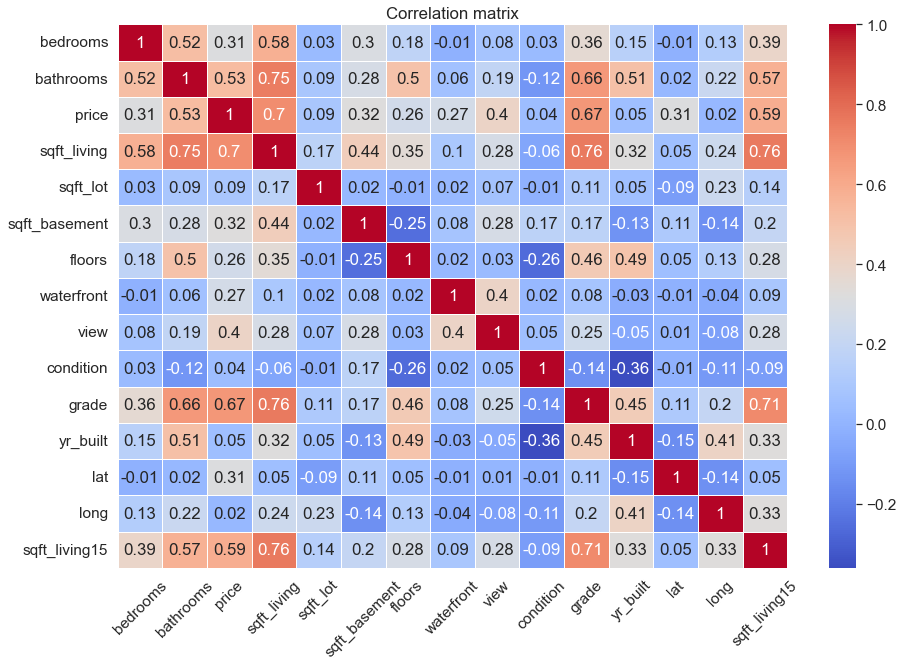

In [25]:
plt.figure(figsize=(15, 10))

sns.set(font_scale=1.4)

sns.heatmap(df_corr, annot=True, linewidths=.5, cmap='coolwarm')
plt.xticks(rotation = 45)

plt.title('Correlation matrix');

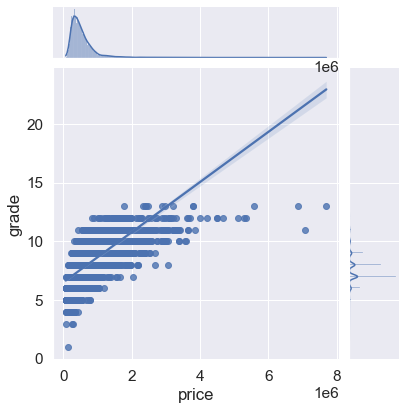

In [56]:
sns.jointplot(x=df['price'], y=df['grade'], kind='reg');

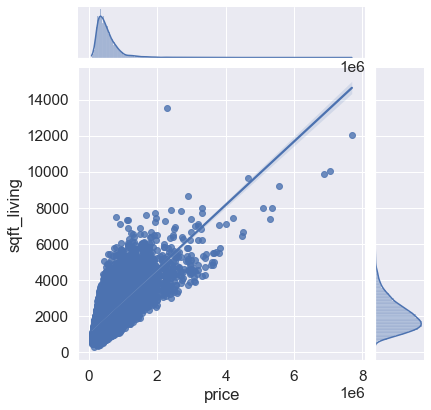

In [58]:
sns.jointplot(x=df['price'], y=df['sqft_living'], kind='reg');

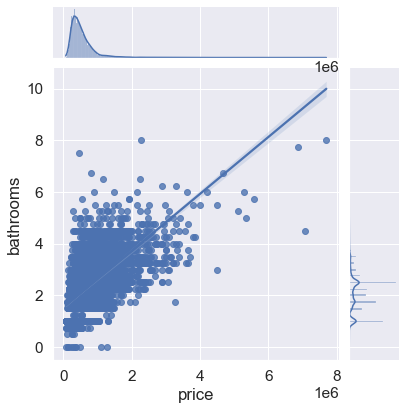

In [59]:
sns.jointplot(x=df['price'], y=df['bathrooms'], kind='reg');

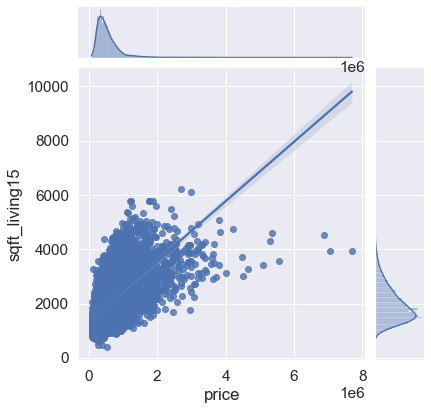

In [60]:
sns.jointplot(x=df['price'], y=df['sqft_living15'], kind='reg');

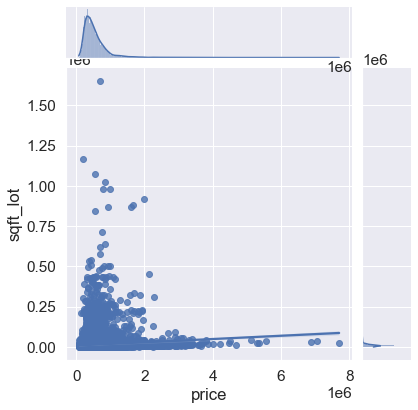

In [63]:
sns.jointplot(x=df['price'], y=df['sqft_lot'], kind='reg');

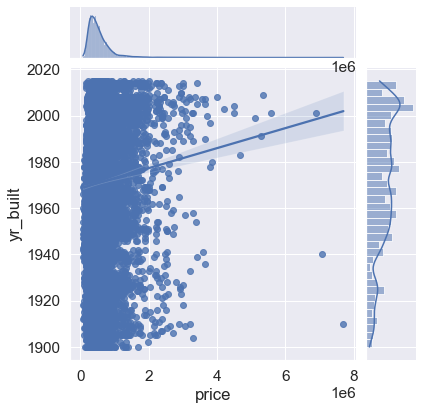

In [65]:
sns.jointplot(x=df['price'], y=df['yr_built'], kind='reg');

**Выводы:**
- Наибольшая прямая зависимость цены квартир существует с жилой площадью (0,7), кроме того есть большая зависимость цены от грейда (0,67), зависимость цены от жилой площади соседей (0,59) и зависимость цены от количества ванных комнат (0,53) 
- от года постройки цена не зависит напрямую, есть зависимость среди домов постройки начиная с 1950 года.
- зависимость цены от общей площади минимальная